# Python Programming Exercises

### Exercise 1
Write a program to solve a classic puzzle: There are 35 heads and 94 legs among the chickens and rabbits in a farm. How many rabbits and how many chickens do we have? Hint: Use for loop to iterate all possible solutions

In [1]:
# c: Number of chickens
# r: Number of rabbits
# c + r = 35
# 2c + 4r = 94

for c in range(36):
    r = 35 - c
    if 2*c + 4*r == 94:
        print(f'{c = }, {r = }')

c = 23, r = 12


### Exercise 2
In this exercise, the task is to read a set of temperature data (the monthly high temperatures at Heathrow Airport for Jan 1948 through Dec 2016) from a file and then find some basic information: the highest and lowest temperatures, the mean (average) temperature, and the median temperature (the temperature in the middle if all the temperatures are sorted).

The temperature data is in the file “Heathrow.txt”. You should find the highest and lowest temperature, the average, and the median.

In [14]:
data = []
with open('data/Heathrow.txt', 'r') as f:
    for line in f:
        temperature = float(line.strip())
        data.append(temperature)

print(len(data))
mini, maxi = min(data), max(data)
mean = sum(data)/len(data)

# Calculate the median
data.sort()
median = (data[len(data)//2] + data[len(data)//2 - 1]) / 2

print(f'Min: {mini}, Max: {maxi}')
print(f'Mean: {mean}, Median: {median}')

828
Min: 0.8, Max: 28.2
Mean: 14.848309178743966, Median: 14.7


### Exercise 3
For the problem in Exercise 1, use NumPy by applying linear algebra to find the solution.

In [19]:
import numpy as np
# c: Number of chickens
# r: Number of rabbits
# c + r = 35
# 2c + 4r = 94

coeffs = np.array([[1, 1], [2, 4]])
depvars = np.array([35, 94])
sol = np.linalg.solve(coeffs, depvars).astype(int)
print(f'c = {sol[0]}, r = {sol[1]}')

c = 23, r = 12


### Exercise 4
Solve Exercise 2 by using Pandas. In addition, find out the coldest month and the hottest month between 1948 and 2016. Plot the mean temperature for each month.

In [23]:
# Using NumPy
import numpy as np

data = np.loadtxt('data/Heathrow.txt')
# print(data)
print(f'Min: {np.min(data)}')
print(f'Max: {np.max(data)}')
print(f'Mean: {np.mean(data)}')
print(f'Median: {np.median(data)}')

Min: 0.8
Max: 28.2
Mean: 14.848309178743962
Median: 14.7


        Temperature
min        0.800000
max       28.200000
mean      14.848309
median    14.700000
Coldest month and year: 1, 1963
Hottest month and year: 7, 2006


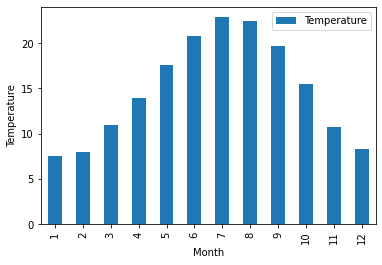

In [82]:
# Using Pandas
import pandas as pd

df = pd.read_csv('data/Heathrow.txt', header=None, names=['Temperature'])
print(df.aggregate(['min', 'max', 'mean', 'median']))

df.index = pd.period_range(start=1948, periods=len(df), freq='M')

coldest_row = df['Temperature'] == df['Temperature'].min()
coldest_month = df.index[coldest_row].month
coldest_year = df.index[coldest_row].year
print(f'Coldest month and year: {coldest_month[0]}, {coldest_year[0]}')

hottest_row = df['Temperature'] == df['Temperature'].max()
hottest_month = df.index[hottest_row].month
hottest_year = df.index[hottest_row].year
print(f'Hottest month and year: {hottest_month[0]}, {hottest_year[0]}')

groups = df.groupby(df.index.month)
groups.mean().plot.bar()
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.show()

df.to_excel('temperature.xlsx')

### Exercise 5
Plot two cycles of a sinusoidal voltage waveform with an amplitude of 2 and frequency of 50Hz and a DC offset of 5V.

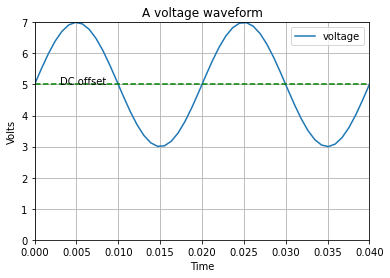

In [69]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

f = 50
t = np.linspace(0, 0.04, 50)
v = 2 * np.sin(2 * np.pi * f * t) + 5
plt.plot(t, v, label='voltage')
plt.axhline(5, color='g', ls='--')
plt.text(0.003, 5, 'DC offset')
plt.grid(axis='both')
plt.xlim(0, 0.04)
plt.ylim(0, 7)
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Volts')
plt.title('A voltage waveform')
plt.show()

### Exercise 6
A voltage waveform has been downloaded from an oscilloscope by using PyVISA. The waveform is stored in the CSV file format and the file can be accessed as 'data/waveform_data.csv'. Load and plot the waveform from the CSV file.

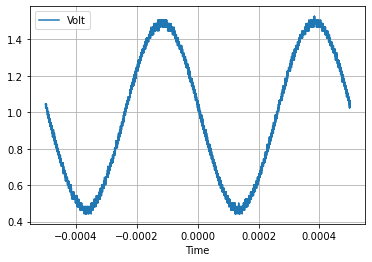

In [87]:
import pandas as pd

df = pd.read_csv('data/waveform_data.csv', header=None, names=['Time', 'Volt'])
df.set_index('Time', inplace=True)
df.plot()
plt.grid(True)
plt.show()

### Exercise 7
Two voltage waveforms have been downloaded from an oscilloscope and stored in the CSV file format, where Channel 1 is connected to a current probe with the setting of 100mV/A, while Channel 2 is connected to a normal probe that measures the voltage. The file can be accessed as 'data/scope_0.csv'. Load the CSV file to plot the waveforms.

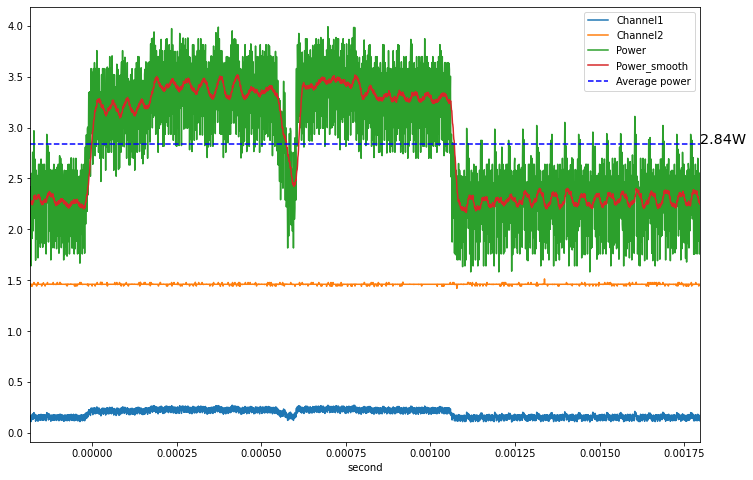

In [124]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/scope_0.csv', header=1)
df.set_index('second', inplace=True)
df.columns = ['Channel1', 'Channel2']

df['Power'] = df['Channel1']/0.1 * df['Channel2']
df['Power_smooth'] = df['Power'].rolling(20).mean()
df.dropna(inplace=True)

average_power = df['Power'].mean()
plt.figure(figsize=(12, 8))
df.plot(ax=plt.gca())
plt.axhline(average_power, color='blue', ls='--', label='Average power')
plt.text(df.index.max(), average_power, f'{average_power:.2f}W', size='x-large')
plt.xlim(df.index.min(), df.index.max())
plt.legend(loc='best')
plt.show()

In [126]:
import numpy as np

# Calculate area under the curve for power
auc = np.trapz(df['Power'], df.index.values - df.index.min())
print(auc)

0.005618079265073693
